In [ ]:
%matplotlib
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

Using matplotlib backend: agg


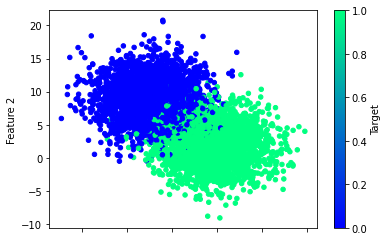

In [ ]:
# Generate dummy dataset
X, y = make_blobs(n_samples=5000, centers=2, n_features=2, random_state=42, cluster_std=3)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter");

In [ ]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [ ]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()
# Fit the scaler
X_scaler.fit(X_train)
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [ ]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=2))

In [ ]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [ ]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 5)                 15        
                                                                 
 dense_61 (Dense)            (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
118/118 [==============================] - 1s 2ms/step - loss: 0.7538 - accuracy: 0.2787
Epoch 2/50
118/118 [==============================] - 0s 1ms/step - loss: 0.6036 - accuracy: 0.7347
Epoch 3/50
118/118 [==============================] - 0s 1ms/step - loss: 0.4892 - accuracy: 0.9389
Epoch 4/50
118/118 [==============================] - 0s 2ms/step - loss: 0.3743 - accuracy: 0.9448
Epoch 5/50
118/118 [==============================] - 0s 1ms/step - loss: 0.2869 - accuracy: 0.9453
Epoch 6/50
118/118 [==============================] - 0s 1ms/step - loss: 0.2301 - accuracy: 0.9459
Epoch 7/50
118/118 [==============================] - 0s 1ms/step - loss: 0.1944 - accuracy: 0.9459
Epoch 8/50
118/118 [==============================] - 0s 1ms/step - loss: 0.1717 - accuracy: 0.9459
Epoch 9/50
118/118 [==============================] - 0s 1ms/step - loss: 0.1567 - accuracy: 0.9472
Epoch 10/50
118/118 [==============================] - 0s 1ms/step - loss: 0.1467 - accuracy: 0.9475

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

40/40 - 0s - loss: 0.1237 - accuracy: 0.9528 - 152ms/epoch - 4ms/step
Loss: 0.12373309582471848, Accuracy: 0.9527999758720398


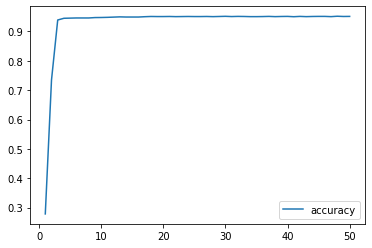

In [ ]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)
history_df.index += 1
# Plot the accuracy
history_df.plot(y="accuracy");

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(300, activation="relu", input_dim=2))
model.add(tf.keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 300)               900       
                                                                 
 dense_59 (Dense)            (None, 10)                3010      
                                                                 
Total params: 3,910
Trainable params: 3,910
Non-trainable params: 0
_________________________________________________________________


In [ ]:
fit_model = model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
118/118 [==============================] - 0s 1ms/step - loss: 1.5184 - accuracy: 0.8685
Epoch 2/50
118/118 [==============================] - 0s 2ms/step - loss: 0.5536 - accuracy: 0.9512
Epoch 3/50
118/118 [==============================] - 0s 2ms/step - loss: 0.3011 - accuracy: 0.9509
Epoch 4/50
118/118 [==============================] - 0s 2ms/step - loss: 0.2229 - accuracy: 0.9509
Epoch 5/50
118/118 [==============================] - 0s 2ms/step - loss: 0.1892 - accuracy: 0.9509
Epoch 6/50
118/118 [==============================] - 0s 1ms/step - loss: 0.1713 - accuracy: 0.9504
Epoch 7/50
118/118 [==============================] - 0s 2ms/step - loss: 0.1605 - accuracy: 0.9515
Epoch 8/50
118/118 [==============================] - 0s 1ms/step - loss: 0.1535 - accuracy: 0.9512
Epoch 9/50
118/118 [==============================] - 0s 1ms/step - loss: 0.1486 - accuracy: 0.9517
Epoch 10/50
118/118 [==============================] - 0s 2ms/step - loss: 0.1450 - accuracy: 0.9504

In [ ]:
model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

40/40 - 0s - loss: 0.1262 - accuracy: 0.9528 - 56ms/epoch - 1ms/step
Loss: 0.12623842060565948, Accuracy: 0.9527999758720398


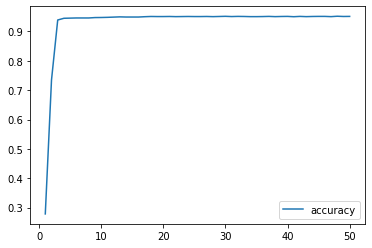

In [ ]:
history_df = pd.DataFrame(fit_model.history)
history_df.index += 1
# Plot the accuracy
history_df.plot(y="accuracy");